In [1]:
#!pip install --upgrade tensorflow


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [3]:
path='C:\\Users\\kalas\\Downloads\\'
data=pd.read_csv(path+'NSE-TATAGLOBAL11.csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
data.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [6]:
N=[(k,data[k].isnull().mean()*100) for k in data]
N=pd.DataFrame(N,columns=['Columns_Name','Percentage'])
N

,Columns_Name,Percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [7]:
sort_acc_date=data.sort_values(by='Date')
sort_acc_date.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [8]:
sort_acc_date.reset_index(inplace=True)
sort_acc_date.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


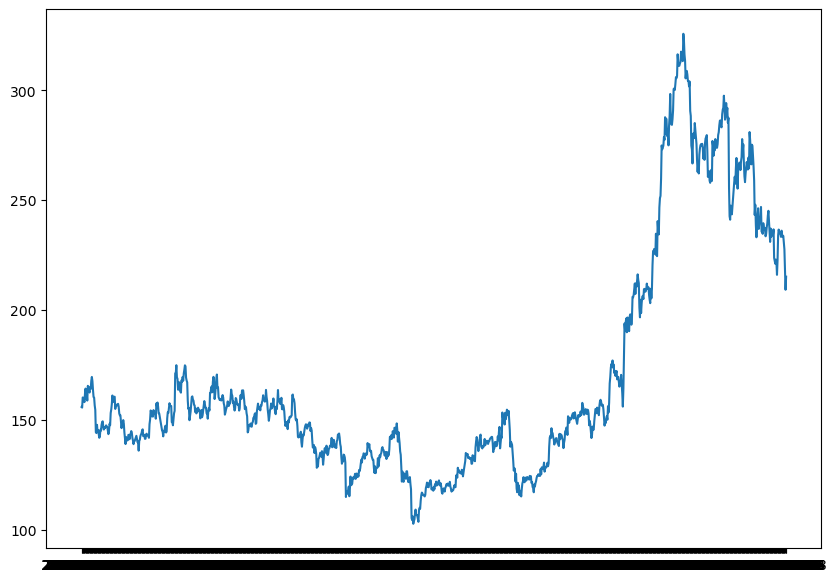

In [9]:
plt.figure(figsize=(10,7))
plt.plot(sort_acc_date['Date'],sort_acc_date['Close'])
plt.show()

In [10]:
close_sort_acc_date= sort_acc_date['Close']
close_sort_acc_date

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

# Feature Scaling (MinMax scaler)

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
close_sort_acc_date=scaler.fit_transform(np.array(close_sort_acc_date).reshape(-1,1))
close_sort_acc_date

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

# Splitting the dataset


In [12]:
train_size=int(len(close_sort_acc_date)*0.7)
test_size=len(close_sort_acc_date)-train_size
train_data,test_data=close_sort_acc_date[0:train_size,:],close_sort_acc_date[train_size:len(close_sort_acc_date),:1]
train_data.shape

(864, 1)

In [13]:
test_data.shape

(371, 1)

# convert an array of values into a dateset matrix

In [14]:
def cr_data(dataset,time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

# reshaping of dataset

In [15]:
time_step=100
X_train,Y_train=cr_data(train_data,time_step)
X_test,Y_test=cr_data(test_data,time_step)
print(X_train.shape)
print(Y_train.shape)

(763, 100)
(763,)


In [16]:
print(X_test.shape)
print(Y_test.shape)

(270, 100)
(270,)


In [17]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train


array([[[0.23823398],
        [0.2371134 ],
        [0.25773196],
        ...,
        [0.17279247],
        [0.16651726],
        [0.16606903]],

       [[0.2371134 ],
        [0.25773196],
        [0.25728373],
        ...,
        [0.16651726],
        [0.16606903],
        [0.14926042]],

       [[0.25773196],
        [0.25728373],
        [0.25459435],
        ...,
        [0.16606903],
        [0.14926042],
        [0.16920663]],

       ...,

       [[0.08628418],
        [0.10197221],
        [0.07171672],
        ...,
        [0.21290901],
        [0.21470193],
        [0.22075303]],

       [[0.10197221],
        [0.07171672],
        [0.06432093],
        ...,
        [0.21470193],
        [0.22075303],
        [0.22411475]],

       [[0.07171672],
        [0.06432093],
        [0.0835948 ],
        ...,
        [0.22075303],
        [0.22411475],
        [0.22590766]]])

# creating the LSTM model

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Prediction and Checking Performance

In [21]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=60, batch_size=64, verbose=1)

Epoch 1/60
11/11 [==============================] - 23s 824ms/step - loss: 0.0095 - val_loss: 0.0015
Epoch 2/60
11/11 [==============================] - 5s 443ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 3/60
11/11 [==============================] - 5s 439ms/step - loss: 0.0020 - val_loss: 7.6709e-04
Epoch 4/60
11/11 [==============================] - 5s 443ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/60
11/11 [==============================] - 5s 449ms/step - loss: 0.0012 - val_loss: 5.9326e-04
Epoch 6/60
11/11 [==============================] - 5s 440ms/step - loss: 0.0010 - val_loss: 6.7213e-04
Epoch 7/60
11/11 [==============================] - 5s 442ms/step - loss: 9.8018e-04 - val_loss: 6.1349e-04
Epoch 8/60
11/11 [==============================] - 5s 426ms/step - loss: 9.4647e-04 - val_loss: 5.8784e-04
Epoch 9/60
11/11 [==============================] - 5s 438ms/step - loss: 9.3580e-04 - val_loss: 5.2277e-04
Epoch 10/60
11/11 [==============================] - 5s 415ms/s

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 1s 85ms/step


In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Calculating the performance 

In [24]:
import math
from sklearn.metrics import mean_squared_error

In [25]:
math.sqrt(mean_squared_error(Y_train,train_predict))

141.50932381898798

In [26]:
math.sqrt(mean_squared_error(Y_test,test_predict))

252.33184129908014

plotting the graph with predicted train data, test data with actual data


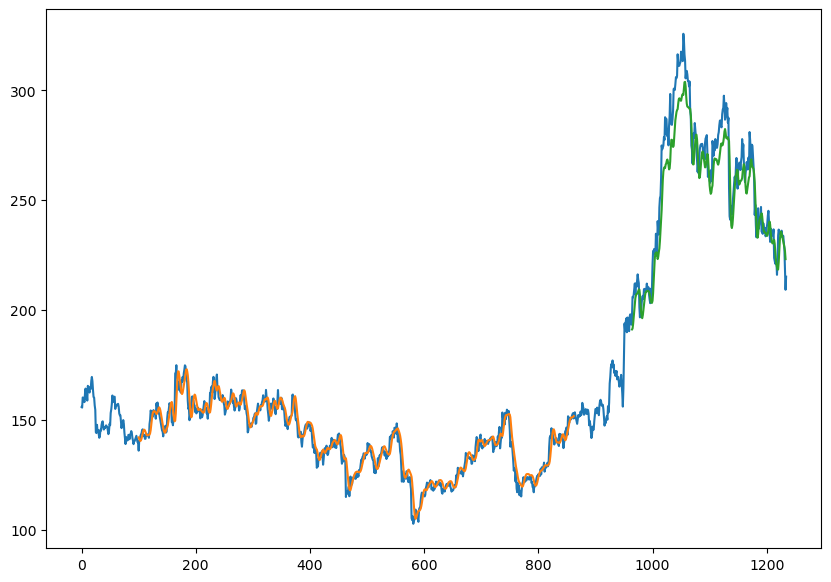

In [27]:
look_back=100
trainPredictPlot=np.empty_like(close_sort_acc_date)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot = np.empty_like(close_sort_acc_date)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_sort_acc_date)-1,:]=test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_sort_acc_date))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

371

In [29]:
pred_input=test_data[271:].reshape(1,-1)
pred_input.shape

(1, 100)

In [30]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [31]:
temp_input

[0.6275212909009413,
 0.6205737337516808,
 0.6492604213357238,
 0.6367099955177049,
 0.6315553563424474,
 0.6476916181084715,
 0.6613626176602418,
 0.680636485880771,
 0.6956521739130435,
 0.7082025997310621,
 0.694083370685791,
 0.7254594352308381,
 0.7465262214253696,
 0.7198565665620797,
 0.6839982070820259,
 0.722097714029583,
 0.7310623038995965,
 0.7371134020618557,
 0.7364410578216045,
 0.7218735992828327,
 0.739354549529359,
 0.7483191393993724,
 0.7850739578664276,
 0.7597489914836395,
 0.7740923352756612,
 0.7368892873151054,
 0.7090990587180637,
 0.6972209771402957,
 0.714701927386822,
 0.7254594352308381,
 0.7382339757956073,
 0.7303899596593455,
 0.7229941730165843,
 0.7471985656656208,
 0.7252353204840878,
 0.7994173016584492,
 0.7828328103989242,
 0.7557149260421334,
 0.7335275661138503,
 0.7736441057821604,
 0.7714029583146571,
 0.7492155983863737,
 0.7285970416853427,
 0.7003585835948003,
 0.6302106678619452,
 0.6510533393097264,
 0.6095921111609144,
 0.584715374271626

In [32]:
lst_output=[]
n_steps=100
i=0
while(i<30): 
    if(len(temp_input)>100):
        pred_input=np.array(temp_input[1:]) 
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)


[0.49463284]
101
1 day input [0.62057373 0.64926042 0.63671    0.63155536 0.64769162 0.66136262
 0.68063649 0.69565217 0.7082026  0.69408337 0.72545944 0.74652622
 0.71985657 0.68399821 0.72209771 0.7310623  0.7371134  0.73644106
 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899 0.77409234
 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944 0.73823398
 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281
 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704
 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537 0.609368
 0.63043478 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426
 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857
 0.59928283 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972
 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044
 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818
 0.53675482 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539
 0.58852532 0.60040341 0.59345585 0.5

8 day output [[0.48297814]]
9 day input [0.7082026  0.69408337 0.72545944 0.74652622 0.71985657 0.68399821
 0.72209771 0.7310623  0.7371134  0.73644106 0.7218736  0.73935455
 0.74831914 0.78507396 0.75974899 0.77409234 0.73688929 0.70909906
 0.69722098 0.71470193 0.72545944 0.73823398 0.73038996 0.72299417
 0.74719857 0.72523532 0.7994173  0.78283281 0.75571493 0.73352757
 0.77364411 0.77140296 0.7492156  0.72859704 0.70035858 0.63021067
 0.65105334 0.60959211 0.58471537 0.609368   0.63043478 0.64388167
 0.6017481  0.61160914 0.62572837 0.62550426 0.64657104 0.59614523
 0.59524877 0.59166293 0.61340206 0.6048857  0.59928283 0.60354101
 0.58673241 0.5912147  0.60466159 0.61272972 0.62909009 0.63872703
 0.61810847 0.59524877 0.57530255 0.60242044 0.58583595 0.5912147
 0.59771403 0.59009413 0.60085164 0.5425818  0.53675482 0.53070372
 0.53922008 0.5349619  0.50806813 0.53787539 0.58852532 0.60040341
 0.59345585 0.59278351 0.59143882 0.58561183 0.59816226 0.58987001
 0.58538772 0.58762887 

16 day output [[0.49517792]]
17 day input [0.7371134  0.73644106 0.7218736  0.73935455 0.74831914 0.78507396
 0.75974899 0.77409234 0.73688929 0.70909906 0.69722098 0.71470193
 0.72545944 0.73823398 0.73038996 0.72299417 0.74719857 0.72523532
 0.7994173  0.78283281 0.75571493 0.73352757 0.77364411 0.77140296
 0.7492156  0.72859704 0.70035858 0.63021067 0.65105334 0.60959211
 0.58471537 0.609368   0.63043478 0.64388167 0.6017481  0.61160914
 0.62572837 0.62550426 0.64657104 0.59614523 0.59524877 0.59166293
 0.61340206 0.6048857  0.59928283 0.60354101 0.58673241 0.5912147
 0.60466159 0.61272972 0.62909009 0.63872703 0.61810847 0.59524877
 0.57530255 0.60242044 0.58583595 0.5912147  0.59771403 0.59009413
 0.60085164 0.5425818  0.53675482 0.53070372 0.53922008 0.5349619
 0.50806813 0.53787539 0.58852532 0.60040341 0.59345585 0.59278351
 0.59143882 0.58561183 0.59816226 0.58987001 0.58538772 0.58762887
 0.57485433 0.56006275 0.51792918 0.47758853 0.50425818 0.49463284
 0.48297226 0.47689971

25 day output [[0.46922907]]
26 day input [0.70909906 0.69722098 0.71470193 0.72545944 0.73823398 0.73038996
 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281 0.75571493
 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704 0.70035858
 0.63021067 0.65105334 0.60959211 0.58471537 0.609368   0.63043478
 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426 0.64657104
 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857  0.59928283
 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972 0.62909009
 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044 0.58583595
 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818  0.53675482
 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539 0.58852532
 0.60040341 0.59345585 0.59278351 0.59143882 0.58561183 0.59816226
 0.58987001 0.58538772 0.58762887 0.57485433 0.56006275 0.51792918
 0.47758853 0.50425818 0.49463284 0.48297226 0.47689971 0.47428212
 0.47384399 0.47488847 0.47698343 0.47978589 0.48297814 0.48626134
 0.48936597 0.492064

In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [34]:
len(close_sort_acc_date)

1235

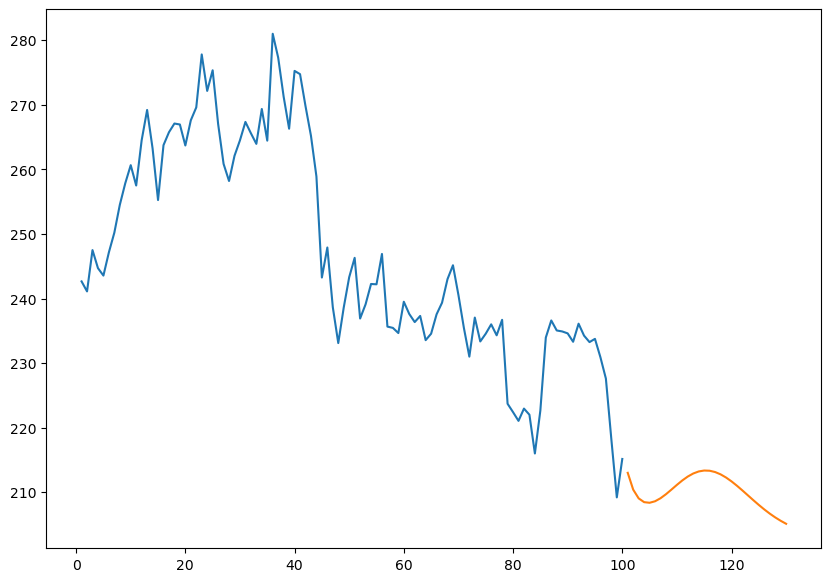

In [35]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_sort_acc_date[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()



Appending in a list is done to make continuous graph

In [36]:
df3=close_sort_acc_date.tolist()
#adding specified list of predicted 30 days output to the end of last 100 days output
df3.extend(lst_output)

In [37]:
print(len(df3))

1265


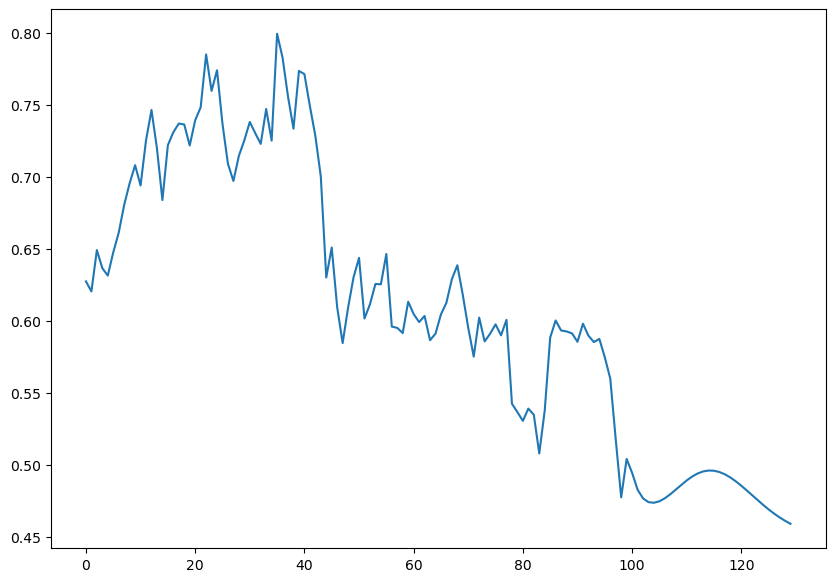

In [38]:
plt.figure(figsize=(10,7))
plt.plot(df3[1135:])
plt.show()#latest 100 days output

Plotting the graph with predicted 30 days output


In [39]:
df3=scaler.inverse_transform(df3).tolist()

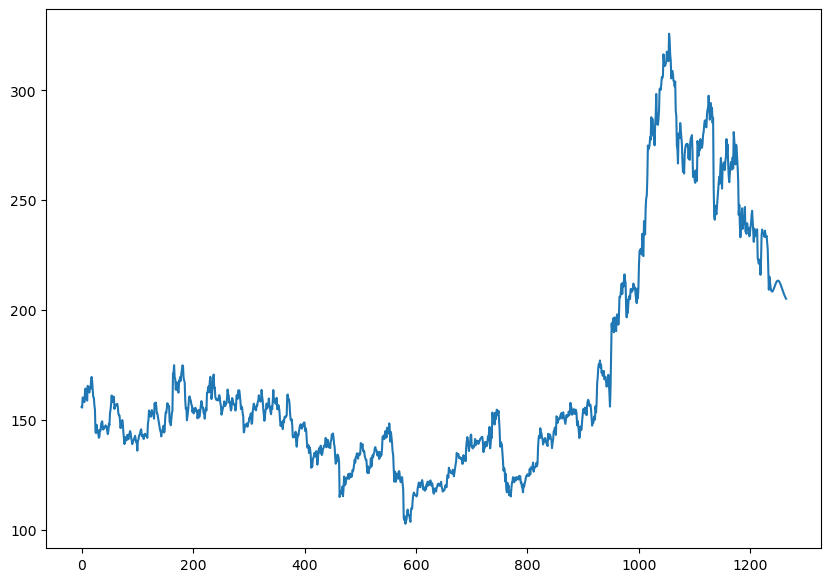

In [40]:
plt.figure(figsize=(10,7))
plt.plot(df3)